In [1]:
from sklearn import tree
import pandas as pd
import numpy as np

In [3]:
## Load input data example 
df_input = pd.read_csv("../Data/RTS24_mod1_DC_fy/input_f_sc01_Network_Existing_Generation_Full_2030.csv")
feature_list = list(df_input.columns)

In [35]:
## Load output data example
df_output = pd.read_csv("../06.Benchmarking/K.Investments_per_hour/RTS24_mod1/3.Out/oT_Hourly_Investments_RTS24_mod1.csv",header = [0,1,2,3,4])

#Convert numerical investment values to booleans
for col in df_output.select_dtypes(include=['float64', 'int64']).columns:
    df_output[col] = df_output[col].apply(lambda x: 0.5 <= x)

In [50]:
df_output.iloc[:,3].sum()

14

In [6]:
# # Convert to numpy arrays
# #All input
# input_array = np.array(df_input.iloc[:,1:])
# #And a single output coumn
# output_array = np.array(df_output.iloc[:,1:])

In [51]:
#Single investment decision
dtree = tree.DecisionTreeClassifier(max_depth = 3,max_leaf_nodes = 6)
dtree = dtree.fit(df_input.iloc[:,1:],df_output.iloc[:,3])

[Text(0.4090909090909091, 0.875, 'N_114 <= 0.176\ngini = 0.003\nsamples = 8736\nvalue = [8722, 14]'),
 Text(0.18181818181818182, 0.625, 'N_110 <= 0.126\ngini = 0.002\nsamples = 8342\nvalue = [8333, 9]'),
 Text(0.09090909090909091, 0.375, 'gini = 0.0\nsamples = 5180\nvalue = [5180, 0]'),
 Text(0.2727272727272727, 0.375, 'gini = 0.006\nsamples = 3162\nvalue = [3153, 9]'),
 Text(0.6363636363636364, 0.625, 'N_104 <= 0.016\ngini = 0.025\nsamples = 394\nvalue = [389, 5]'),
 Text(0.45454545454545453, 0.375, '101_PV_3 <= 0.04\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.36363636363636365, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5454545454545454, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8181818181818182, 0.375, 'N_105 <= 0.022\ngini = 0.015\nsamples = 389\nvalue = [386, 3]'),
 Text(0.7272727272727273, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.9090909090909091, 0.125, 'gini = 0.01\nsamples = 386\nvalue = [384, 2]')]

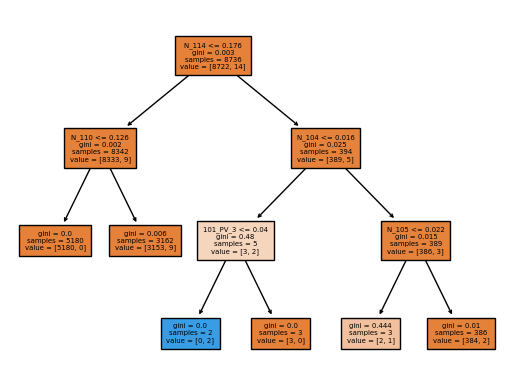

In [52]:
tree.plot_tree(dtree,feature_names = df_input.columns[1:],fontsize = 5,filled = True)

In [54]:
#All investment decisions
dtree = tree.DecisionTreeClassifier(max_depth = 3,max_leaf_nodes = 6)
dtree = dtree.fit(df_input.iloc[:,1:],df_output.iloc[:,1:])

[Text(0.4090909090909091, 0.875, '101_PV_4 <= 0.0\ngini = 0.195\nsamples = 8736\nvalue = [[6750, 1986]\n[7369, 1367]\n[8722, 14]\n[6723, 2013]\n[8736, 0]\n[6620, 2116]\n[6791, 1945]\n[6625, 2111]\n[8736, 0]\n[7012, 1724]\n[8458, 278]\n[6284, 2452]\n[8643, 93]\n[8486, 250]\n[6409, 2327]\n[7577, 1159]\n[8736, 0]\n[7179, 1557]\n[8736, 0]\n[8319, 417]\n[7838, 898]]'),
 Text(0.18181818181818182, 0.625, 'N_101 <= 0.071\ngini = 0.04\nsamples = 3543\nvalue = [[3400, 143]\n[3436, 107]\n[3543, 0]\n[3459, 84]\n[3543, 0]\n[3344, 199]\n[3170, 373]\n[3410, 133]\n[3543, 0]\n[3498, 45]\n[3538, 5]\n[3358, 185]\n[3543, 0]\n[3538, 5]\n[3342, 201]\n[3518, 25]\n[3543, 0]\n[3519, 24]\n[3543, 0]\n[3499, 44]\n[3522, 21]]'),
 Text(0.09090909090909091, 0.375, 'gini = 0.01\nsamples = 3200\nvalue = [[3180, 20]\n[3193, 7]\n[3200, 0]\n[3196, 4]\n[3200, 0]\n[3158, 42]\n[3033, 167]\n[3189, 11]\n[3200, 0]\n[3193, 7]\n[3198, 2]\n[3187, 13]\n[3200, 0]\n[3198, 2]\n[3141, 59]\n[3199, 1]\n[3200, 0]\n[3194, 6]\n[3200, 0]\n[

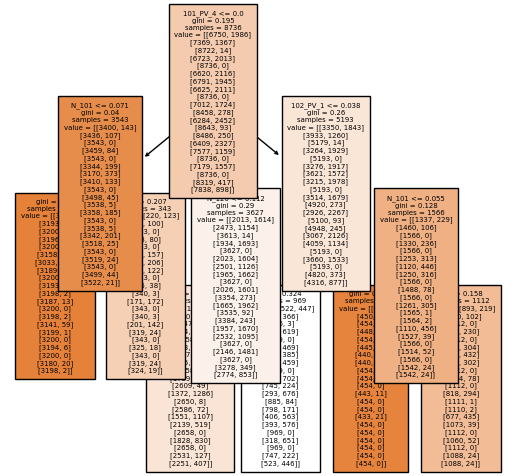

In [55]:
tree.plot_tree(dtree,feature_names = df_input.columns[1:],fontsize = 5,filled = True)